In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import re
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Splitting into training and testing sets
from sklearn.model_selection import train_test_split

# Scaling data
from sklearn.preprocessing import StandardScaler

# models
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



# evaluation metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error


In [2]:
milan_housing=pd.read_csv("milan_housing.csv")
milan_housing.shape

(2130, 34)

In [3]:
milan_housing.head()

,index,rooms,m2,bathrooms,floor,condominium_expenses,date,contract,typology,total_floors,...,energy_certification,co2_emissions,elevator,floor_level,heating_centralized,heating_radiator,heating_gas,air_conditiong_centralized,air_conditioning_heat,renewable_energy_performance_index_KWh/m2
0,0,3,140.0,2,4,535,08/02/2023,sale,apartment | entire property | stately property...,6 floors,...,NaN,NaN,1,4,centralized,to radiators,methane powered,autonomous,cold/hot,NaN
1,0,4,121.0,2,3,200,17/02/2023,sale,apartment | entire property | stately property...,7 floors,...,NaN,NaN,1,3,autonomous,to radiators,gas powered,system preparation,NaN,NaN
2,0,2,55.0,1,4,133,20/02/2023,sale,attic | entire property | stately property class,4 floors,...,NaN,NaN,1,4,autonomous,to radiators,gas powered,autonomous,cold/hot,NaN
3,0,2,60.0,1,5,333,11/01/2023,sale,attic | bare ownership | medium property class,5 floors,...,NaN,NaN,1,5,centralized,to radiators,methane powered,autonomous,cold,NaN
4,0,4,220.0,3,4,NaN,23/01/2023,sale,apartment | entire property | stately property...,7 floors,...,NaN,NaN,1,4,centralized,to radiators,methane powered,autonomous,cold/hot,351.0


In [4]:
milan_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   index                                      2130 non-null   int64  
 1   rooms                                      2116 non-null   object 
 2   m2                                         2113 non-null   float64
 3   bathrooms                                  2105 non-null   object 
 4   floor                                      1849 non-null   object 
 5   condominium_expenses                       1670 non-null   object 
 6   date                                       2116 non-null   object 
 7   contract                                   2116 non-null   object 
 8   typology                                   2116 non-null   object 
 9   total_floors                               2083 non-null   object 
 10  availability            

In [5]:
milan_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2130.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
m2,2113.0,709.609087,27190.783179,1.0,70.0,100.0,140.0,1250000.0
price,1987.0,731128.407146,661979.895398,20000.0,329500.0,520000.0,868000.0,5300000.0
year_of_build,1893.0,1961.295827,52.262219,1100.0,1940.0,1960.0,1990.0,2025.0
housing units,82.0,223.585366,778.123462,4.0,17.0,33.0,71.5,5757.0
elevator,2130.0,0.785446,0.410609,0.0,1.0,1.0,1.0,1.0
renewable_energy_performance_index_KWh/m2,117.0,2814.145299,5576.682527,1.0,351.0,351.0,1193.0,24993.0


In [6]:
milan_housing.isna().sum()

index                                           0
rooms                                          14
m2                                             17
bathrooms                                      25
floor                                         281
condominium_expenses                          460
date                                           14
contract                                       14
typology                                       14
total_floors                                   47
availability                                  441
other_features                                 36
price                                         143
year_of_build                                 237
condition                                     113
air_conditioning                              519
energy_efficiency                             154
city                                           14
neighborhood                                   14
car_parking                                  1542


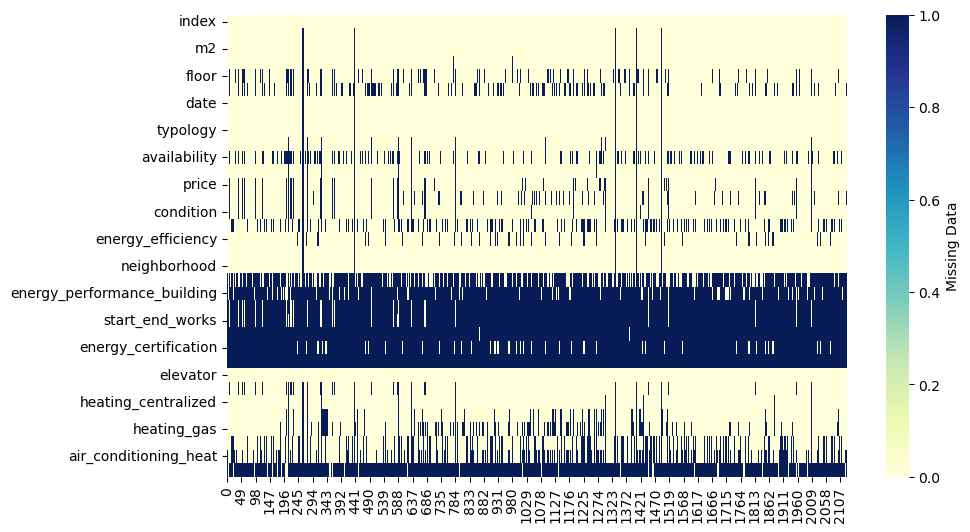

In [7]:
import seaborn as sns
# Visualising missing data
plt.figure(figsize=(10,6))
sns.heatmap(milan_housing.isna().transpose(),vmin=0, vmax=1, cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'});

plt.savefig("missing_data_with_heatmap.png", dpi=100);

In [8]:
# Deleting columns with non relevant columns with large missing numbers
milan_housing.drop(["index","housing units","date","city","total_floors","contract",
                    "energy_performance_building","typology","other_features","floor_level",
                    "current_building_use","energy_certification",
                    "start_end_works","co2_emissions","renewable_energy_performance_index_KWh/m2"], 
                    axis=1, inplace=True)

In [9]:
milan_housing

,rooms,m2,bathrooms,floor,condominium_expenses,availability,price,year_of_build,condition,air_conditioning,energy_efficiency,neighborhood,car_parking,elevator,heating_centralized,heating_radiator,heating_gas,air_conditiong_centralized,air_conditioning_heat
0,3,140.0,2,4,535,libero,880000.0,1900.0,very good / refurbished,"autonomous, cold/heat",d248.59 kwh/m² year,centrale,NaN,1,centralized,to radiators,methane powered,autonomous,cold/hot
1,4,121.0,2,3,200,libero,649000.0,1960.0,very good / refurbished,system preparation,"e≥ 3,51 kwh/m² year",centrale,NaN,1,autonomous,to radiators,gas powered,system preparation,NaN
2,2,55.0,1,4,133,libero,300000.0,2006.0,good / habitable,"autonomous, cold/heat",e183.89 kwh/m² year,viale ungheria - mecenate,1 in garage/box,1,autonomous,to radiators,gas powered,autonomous,cold/hot
3,2,60.0,1,5,333,libero,250000.0,1960.0,very good / refurbished,"autonomous, cold",f138.8 kwh/m² year,città studi,NaN,1,centralized,to radiators,methane powered,autonomous,cold
4,4,220.0,3,4,NaN,libero,2250000.0,1970.0,good / habitable,"autonomous, cold/heat","g≥ 3,51 kwh/m² year",piave - tricolore,1 in garage/box,1,centralized,to radiators,methane powered,autonomous,cold/hot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,2,70.0,1,10,135,libero,338000.0,2009.0,very good / refurbished,"autonomous, cold/heat","b≥ 3,51 kwh/m² year",bicocca,NaN,1,centralized,by air,methane powered,autonomous,cold/hot
2126,3,90.0,2,R,183,libero,280000.0,1960.0,very good / refurbished,"autonomous, cold",f174 kwh/m² year,lorenteggio,NaN,1,centralized,to radiators,methane powered,autonomous,cold
2127,3,130.0,2,T,200,libero,625000.0,1940.0,very good / refurbished,"autonomous, cold/heat",f≥ 175 kwh/m² year,melchiorre gioia,NaN,0,autonomous,by air,powered by heat pump,autonomous,cold/hot
2128,2,51.0,1,1,NaN,libero,440000.0,NaN,very good / refurbished,system preparation,f193.44 kwh/m² year,porta venezia,NaN,1,autonomous,to radiators,gas powered,system preparation,NaN


## DATA CLEANING

In [10]:
# Provide a summary of the dataset
print(f'Data contains {milan_housing.shape[0]} records and {milan_housing.shape[1]} columns.\n')
print("Data Types:\n")
print(milan_housing.dtypes)
print("\nSummary Statistics:\n")
print(milan_housing.describe())

Data contains 2130 records and 19 columns.

Data Types:

rooms                          object
m2                            float64
bathrooms                      object
floor                          object
condominium_expenses           object
availability                   object
price                         float64
year_of_build                 float64
condition                      object
air_conditioning               object
energy_efficiency              object
neighborhood                   object
car_parking                    object
elevator                        int64
heating_centralized            object
heating_radiator               object
heating_gas                    object
air_conditiong_centralized     object
air_conditioning_heat          object
dtype: object

Summary Statistics:

                 m2         price  year_of_build     elevator
count  2.113000e+03  1.987000e+03    1893.000000  2130.000000
mean   7.096091e+02  7.311284e+05    1961.295827     0.785446

In [11]:
# Define the mappings for floor types and ordinal categories
floor_types = {
    "S": -1,
    "T": 0,
    "M": 0.5
}

ordinal_categories = [
    'new / under construction',
    'very good / refurbished',
    'good / habitable',
    'to be restructured'
]

category_codes = ['NEW', 'VG', 'G', 'TBR']

ordinal_dtype = pd.CategoricalDtype(categories=ordinal_categories, ordered=True)

In [12]:
## Categorical
import pandas as pd

def extract_energy_class(energy_efficiency):
    """
    Extract the energy class from the energy efficiency value.
    """
    if pd.notnull(energy_efficiency) and len(energy_efficiency) > 0:
        return energy_efficiency[0].upper()
    return None

# Assuming milan_housing is your pandas DataFrame containing the data
if "energy_efficiency" in milan_housing.columns:
    milan_housing['energy_class'] = milan_housing['energy_efficiency'].apply(extract_energy_class).astype('object')
else:
    print("Error: 'energy_efficiency' column not found in the DataFrame.")

In [13]:
# Numeric
import pandas as pd
import re

def extract_numeric_values_from_string(value):
    """
    Extracts numeric values from a given string.

    Args:
        value (str): Input string that may contain numeric values.

    Returns:
        float or None: The extracted numeric value as a float, or None if no numeric value is found.
    """
    pattern = r'\d+'  #-- Matches one or more digits
    match = re.search(pattern, value)
    if match:
        return int(match.group())
    else:
        return None

def convert_to_numeric(df, column):
    """
    Converts the values in the specified columns of the DataFrame to numeric types.

    Args:
        df (pandas.DataFrame): The DataFrame.
        columns (list): A list of column names to convert.

    Returns:
        pandas.DataFrame: The DataFrame with converted numeric values.
    """
    return pd.to_numeric(df[column].astype(str).apply(extract_numeric_values_from_string), errors='coerce')

milan_housing['rooms'] = convert_to_numeric(milan_housing, "rooms")
milan_housing['m2'] = convert_to_numeric(milan_housing, "m2")
milan_housing['bathrooms'] = convert_to_numeric(milan_housing, "bathrooms")
milan_housing['condominium_expenses'] = convert_to_numeric(milan_housing, "condominium_expenses")
milan_housing['floor'] = pd.to_numeric(milan_housing['floor'].map(floor_types).fillna(milan_housing['floor']), errors='coerce')


milan_housing['energy_efficiency'] = milan_housing['energy_efficiency'].str.extract(r'(\d+[\.,]?\d*)')
milan_housing['energy_efficiency'] = milan_housing['energy_efficiency'].str.replace(',','.').astype(float)

In [14]:
milan_housing['condition'] = pd.Categorical(
    milan_housing['condition'],
    categories = ordinal_categories,
    ordered = True).rename_categories(category_codes)

In [15]:
# Boolean

# Function to convert a column to boolean type and fill missing values with False
def convert_to_boolean(df, column):
    df[column] = df[column].fillna(False).astype(bool)

# Columns to be converted to boolean type
boolean_columns = ['air_conditioning', 'availability', 'car_parking', 'elevator']

# Apply the function to each column
for column in boolean_columns:
    convert_to_boolean(milan_housing, column)

In [16]:
milan_housing.dtypes

rooms                          float64
m2                             float64
bathrooms                      float64
floor                          float64
condominium_expenses           float64
availability                      bool
price                          float64
year_of_build                  float64
condition                     category
air_conditioning                  bool
energy_efficiency              float64
neighborhood                    object
car_parking                       bool
elevator                          bool
heating_centralized             object
heating_radiator                object
heating_gas                     object
air_conditiong_centralized      object
air_conditioning_heat           object
energy_class                    object
dtype: object

In [17]:
milan_housing.describe()

,rooms,m2,bathrooms,floor,condominium_expenses,price,year_of_build,energy_efficiency
count,2116.000000,2.113000e+03,2102.000000,1656.000000,1670.000000,1.987000e+03,1893.000000,1933.000000
mean,3.525520,7.096091e+02,1.972407,2.923913,234.590419,7.311284e+05,1961.295827,147.375629
std,16.257119,2.719078e+04,2.855258,2.497178,162.023635,6.619799e+05,52.262219,89.449700
min,0.000000,1.000000e+00,1.000000,-1.000000,1.000000,2.000000e+04,1100.000000,1.000000
25%,2.000000,7.000000e+01,1.000000,1.000000,125.000000,3.295000e+05,1940.000000,112.000000
50%,3.000000,1.000000e+02,2.000000,2.000000,200.000000,5.200000e+05,1960.000000,175.000000
75%,4.000000,1.400000e+02,2.000000,4.000000,300.000000,8.680000e+05,1990.000000,175.000000
max,740.000000,1.250000e+06,71.000000,19.000000,950.000000,5.300000e+06,2025.000000,1167.100000


### Exploratory Data Analysis 

In this section we address the following:
- Removing Outliers 
- Exploring the dataset further looking for insights and patterns
- Deal with missing values
- Correlation Matrix

In [18]:
def remove_outliers(df, num_std=3, numeric_data_types=['int', 'float']):
    """
    Removes outliers in numeric columns of the DataFrame based on z-scores.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.
        num_std (int): The number of standard deviations to use as the outlier threshold.
        numeric_data_types (list): The data types to consider for outlier detection.

    Returns:
        pandas.DataFrame: A new DataFrame with rows that have no outliers.
    """
    numeric_columns = df.select_dtypes(include=numeric_data_types)
    z_scores = np.abs((numeric_columns - numeric_columns.mean()) / numeric_columns.std())
    outlier_mask = z_scores > num_std
    return df[~outlier_mask.any(axis=1)]

# Assuming milan_housing is your pandas DataFrame containing the data

# Set the number of standard deviations as the threshold for outlier detection
threshold = 3

# Detect outliers and obtain a DataFrame with rows that have no outliers
milan_outliers = remove_outliers(milan_housing, num_std=threshold)

# Optional: If you want to reset the DataFrame index after filtering, use the following line
# milan_outliers.reset_index(drop=True, inplace=True)

milan_outliers

,rooms,m2,bathrooms,floor,condominium_expenses,availability,price,year_of_build,condition,air_conditioning,energy_efficiency,neighborhood,car_parking,elevator,heating_centralized,heating_radiator,heating_gas,air_conditiong_centralized,air_conditioning_heat,energy_class
0,3.0,140.0,2.0,4.0,535.0,True,880000.0,1900.0,VG,True,248.59,centrale,False,True,centralized,to radiators,methane powered,autonomous,cold/hot,D
1,4.0,121.0,2.0,3.0,200.0,True,649000.0,1960.0,VG,True,3.51,centrale,False,True,autonomous,to radiators,gas powered,system preparation,NaN,E
2,2.0,55.0,1.0,4.0,133.0,True,300000.0,2006.0,G,True,183.89,viale ungheria - mecenate,True,True,autonomous,to radiators,gas powered,autonomous,cold/hot,E
3,2.0,60.0,1.0,5.0,333.0,True,250000.0,1960.0,VG,True,138.80,città studi,False,True,centralized,to radiators,methane powered,autonomous,cold,F
4,4.0,220.0,3.0,4.0,NaN,True,2250000.0,1970.0,G,True,3.51,piave - tricolore,True,True,centralized,to radiators,methane powered,autonomous,cold/hot,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,2.0,70.0,1.0,10.0,135.0,True,338000.0,2009.0,VG,True,3.51,bicocca,False,True,centralized,by air,methane powered,autonomous,cold/hot,B
2126,3.0,90.0,2.0,NaN,183.0,True,280000.0,1960.0,VG,True,174.00,lorenteggio,False,True,centralized,to radiators,methane powered,autonomous,cold,F
2127,3.0,130.0,2.0,0.0,200.0,True,625000.0,1940.0,VG,True,175.00,melchiorre gioia,False,False,autonomous,by air,powered by heat pump,autonomous,cold/hot,F
2128,2.0,51.0,1.0,1.0,NaN,True,440000.0,NaN,VG,True,193.44,porta venezia,False,True,autonomous,to radiators,gas powered,system preparation,NaN,F


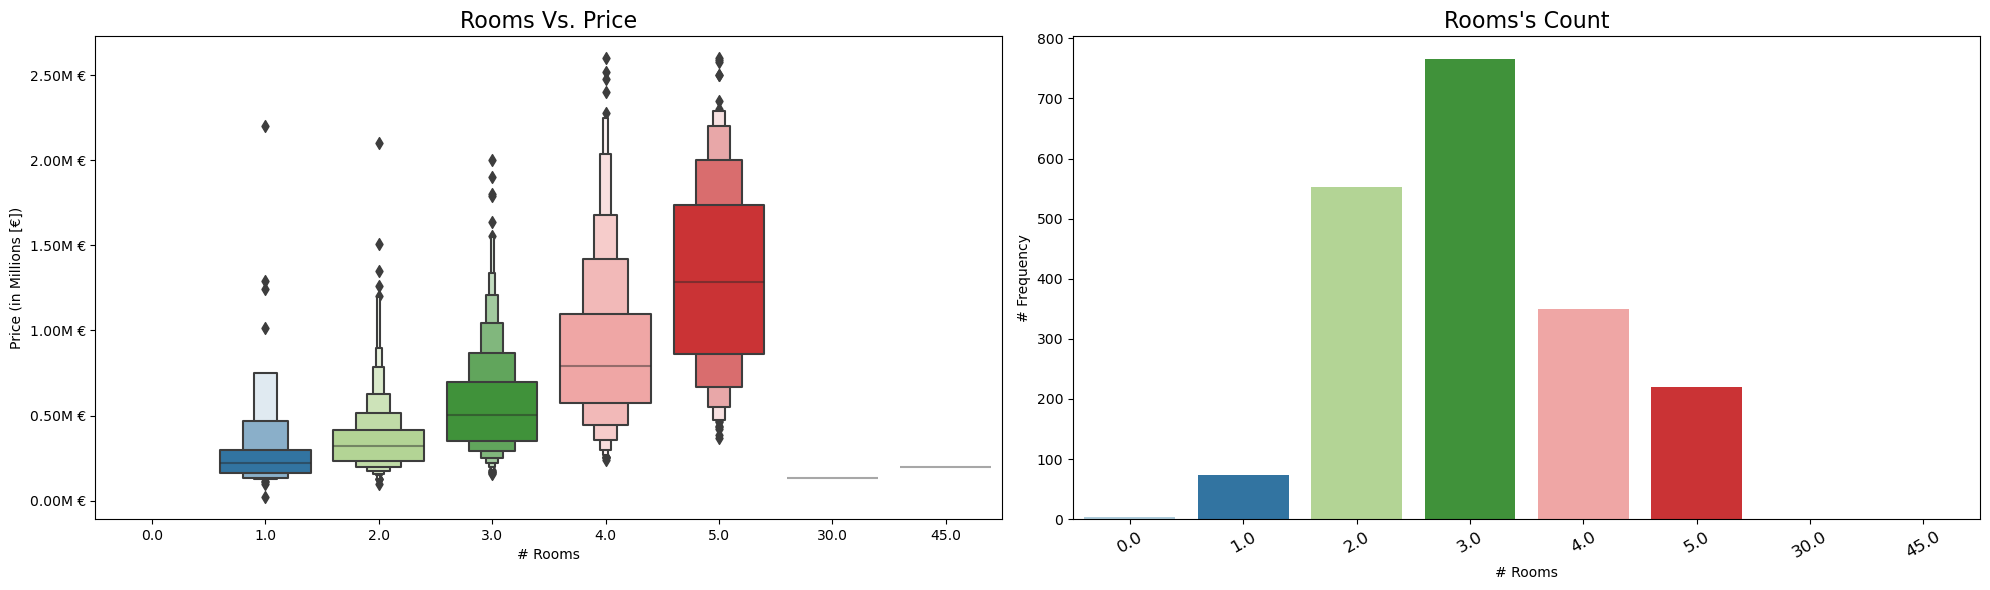

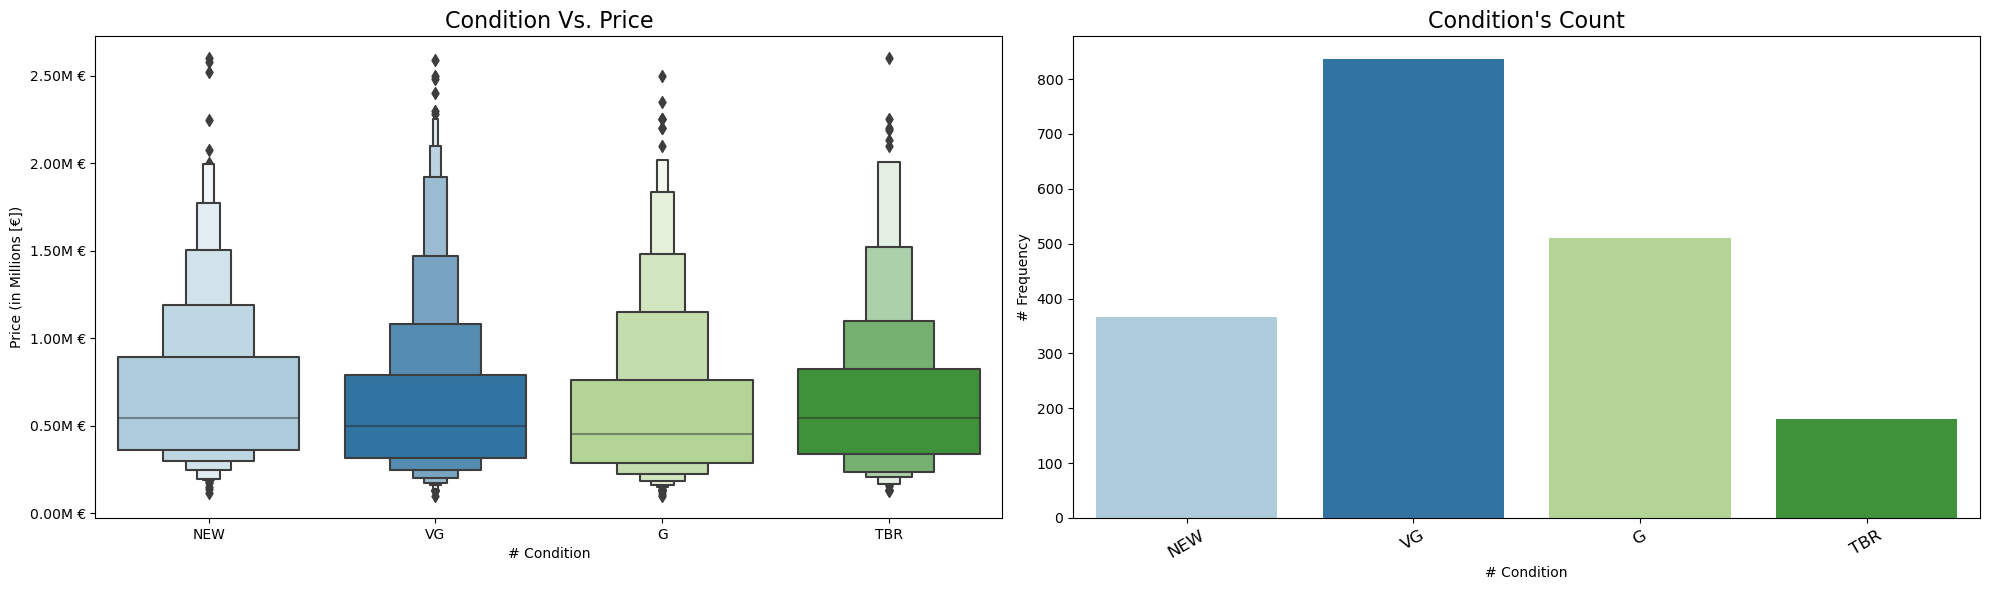

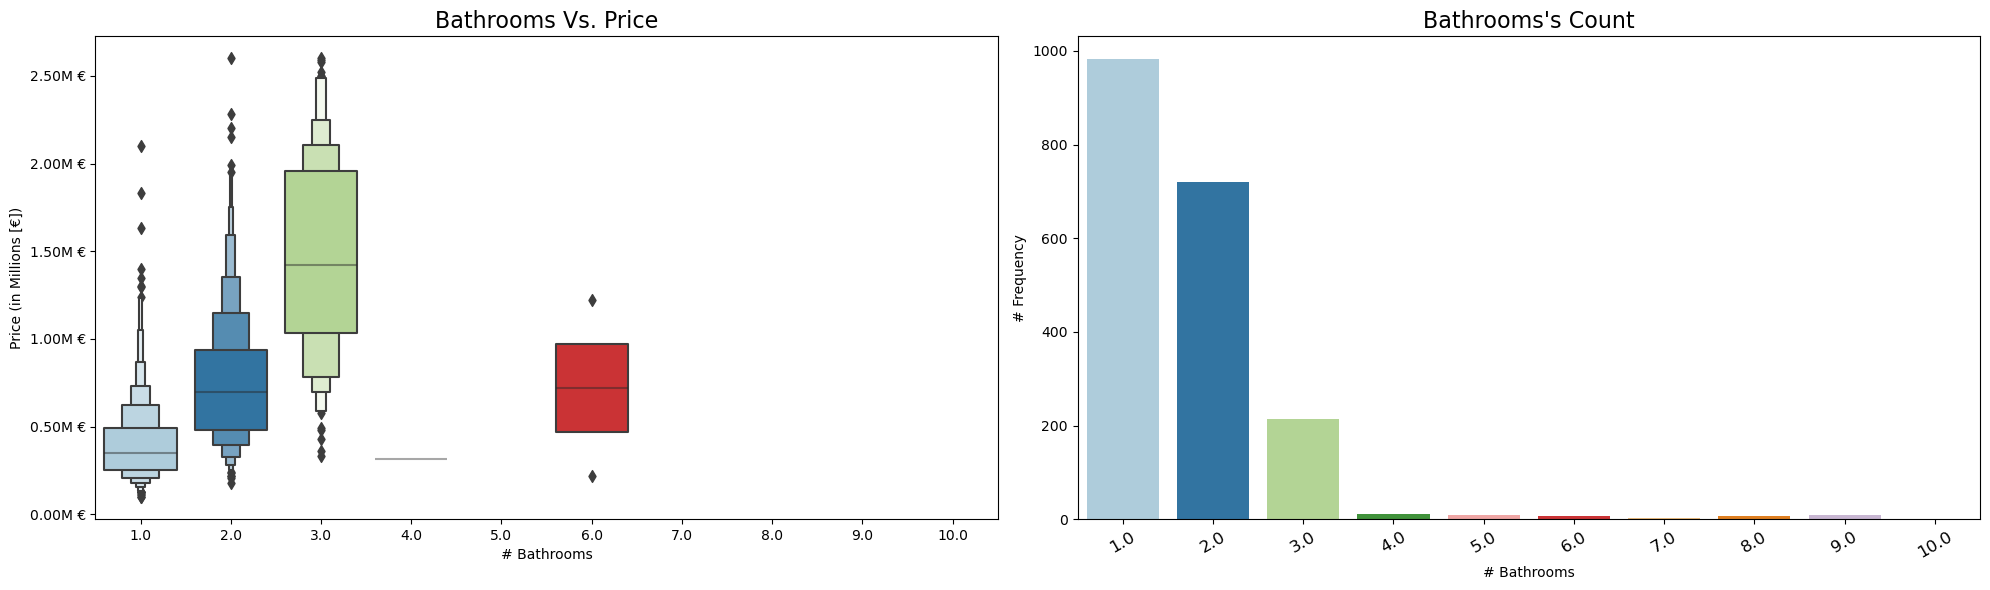

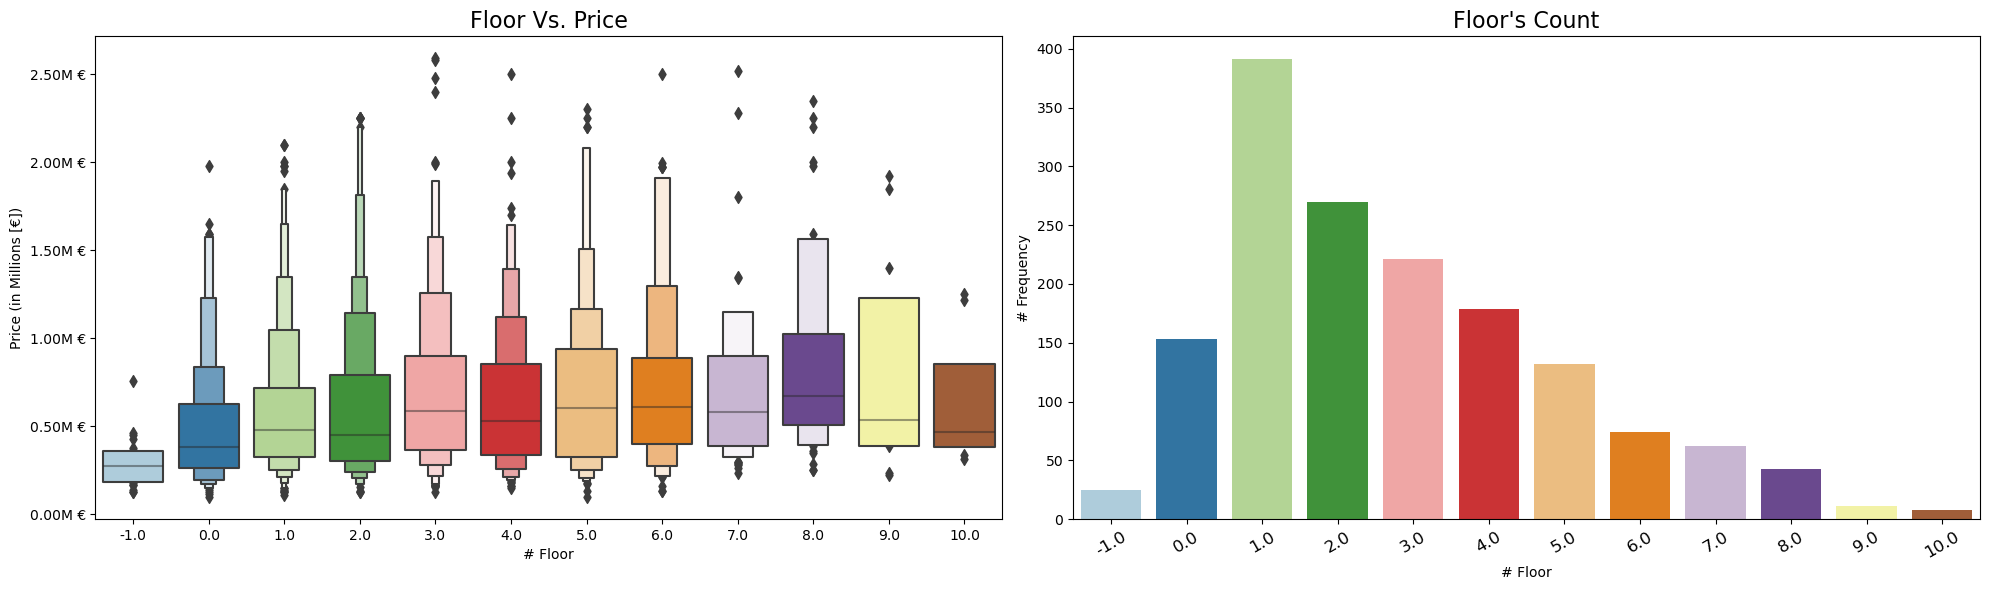

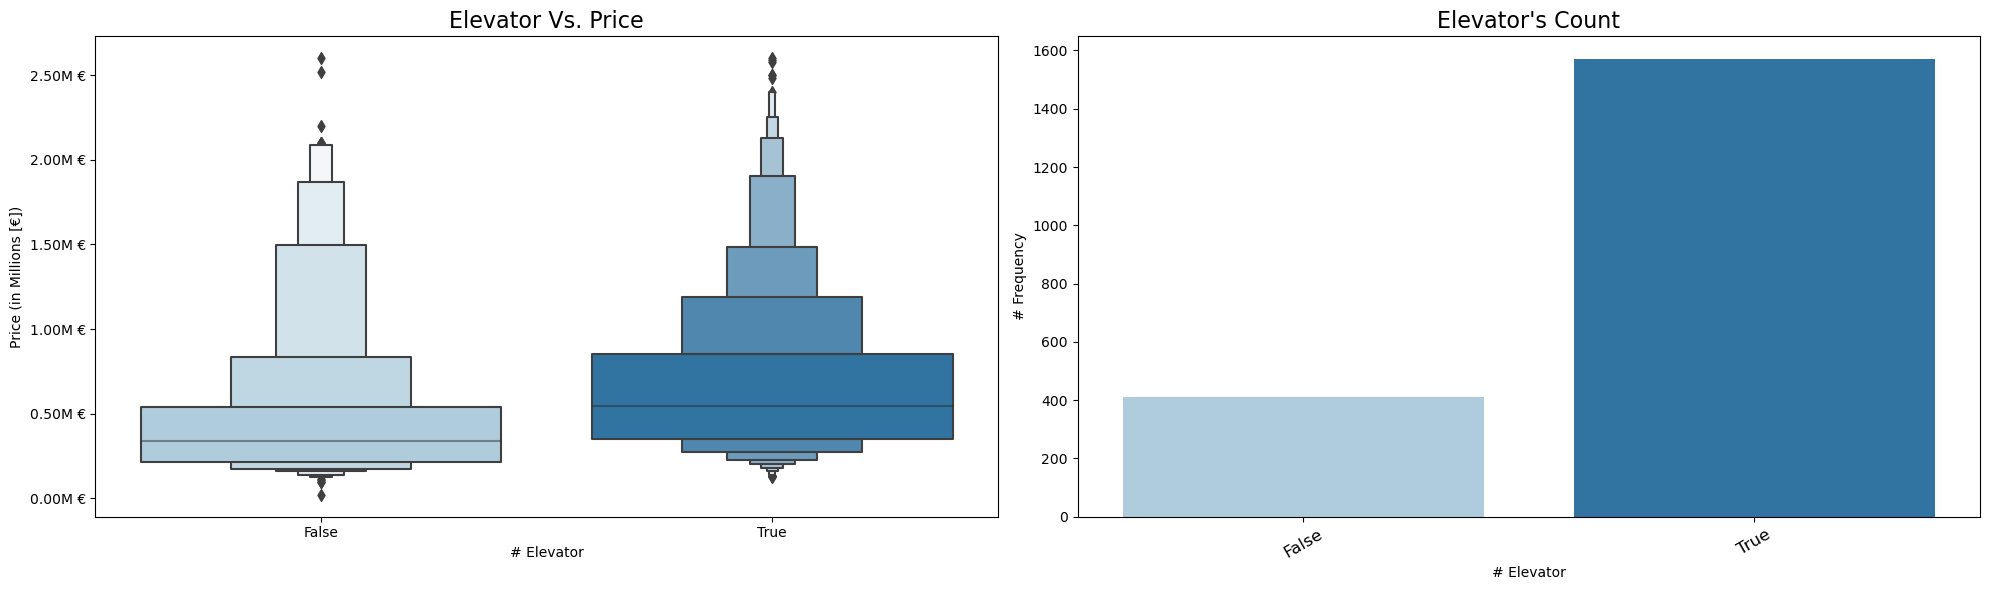

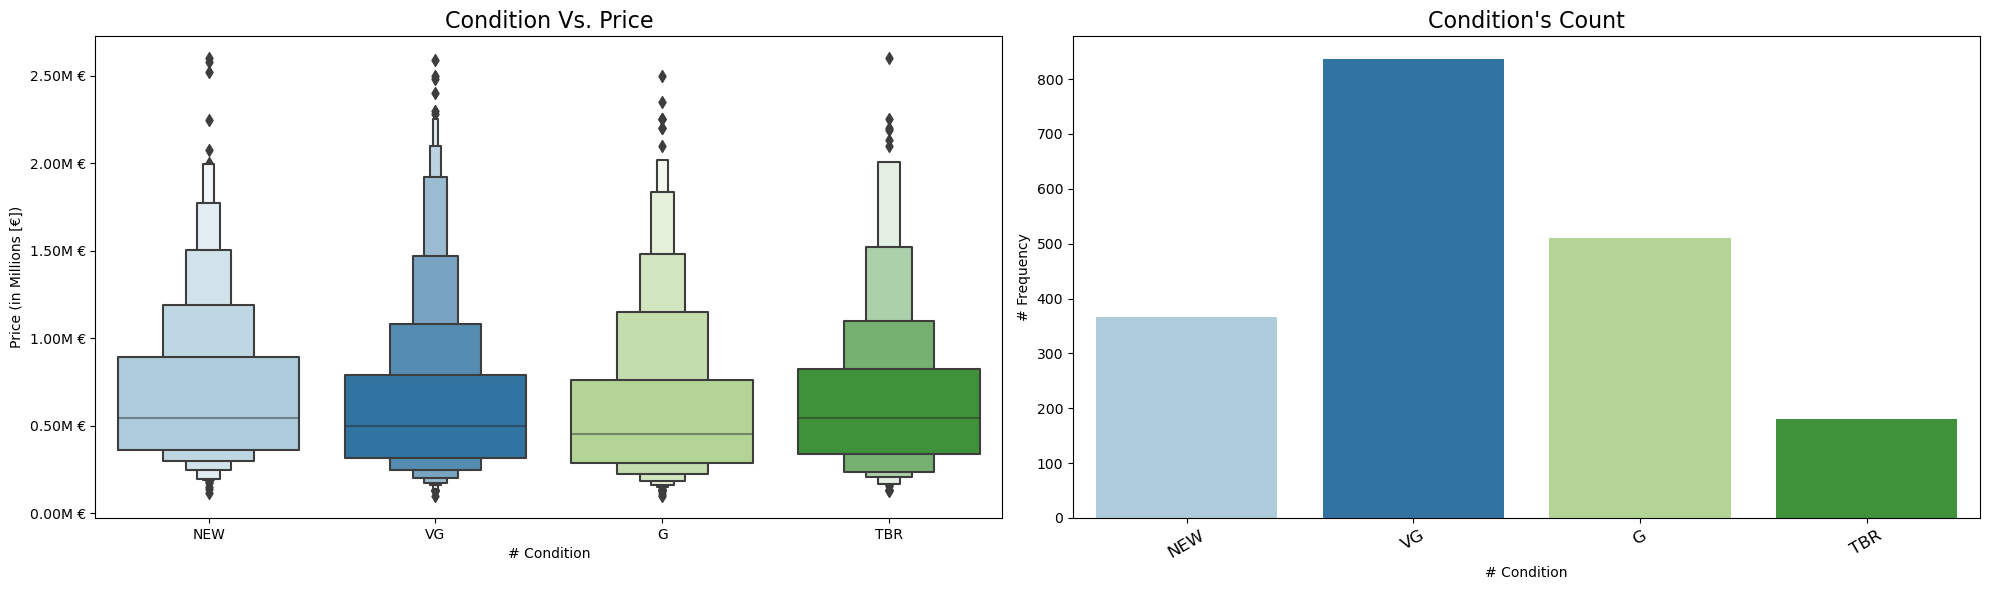

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def draw_subplots(df, feature, target='price'):
    plt.figure(figsize=(20, 6))
    sns.set_palette('Paired')
    
    # Boxenplot
    plt.subplot(1, 2, 1)
    sns.boxenplot(data=df, x=feature, y=target)
    plt.title(f'{feature.capitalize()} Vs. {target.capitalize()}', fontsize=16)
    plt.xlabel(f'# {feature.capitalize()}')
    plt.ylabel(f"{target.capitalize()} (in Millions [€])")
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/(1000000)) + 'M €'))
    
    # Countplot
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=feature)
    plt.title(f'{feature.capitalize()}\'s Count', fontsize=16)
    plt.xlabel(f'# {feature.capitalize()}')
    plt.ylabel("# Frequency")
    plt.xticks(rotation=30, size=12)
    plt.tight_layout()
    plt.show()
    
# Visualize 'rooms' against 'price'
draw_subplots(milan_outliers, "rooms")

# Visualize 'condition' against 'price'
draw_subplots(milan_outliers, "condition")

# Visualize 'bathrooms' against 'price'
draw_subplots(milan_outliers, "bathrooms")

# Visualize 'floor' against 'price'
draw_subplots(milan_outliers, "floor")

# Visualize 'condominium_expenses' against 'price'
draw_subplots(milan_outliers, "elevator")

# Visualize 'condition' against 'price'
draw_subplots(milan_outliers, "condition")

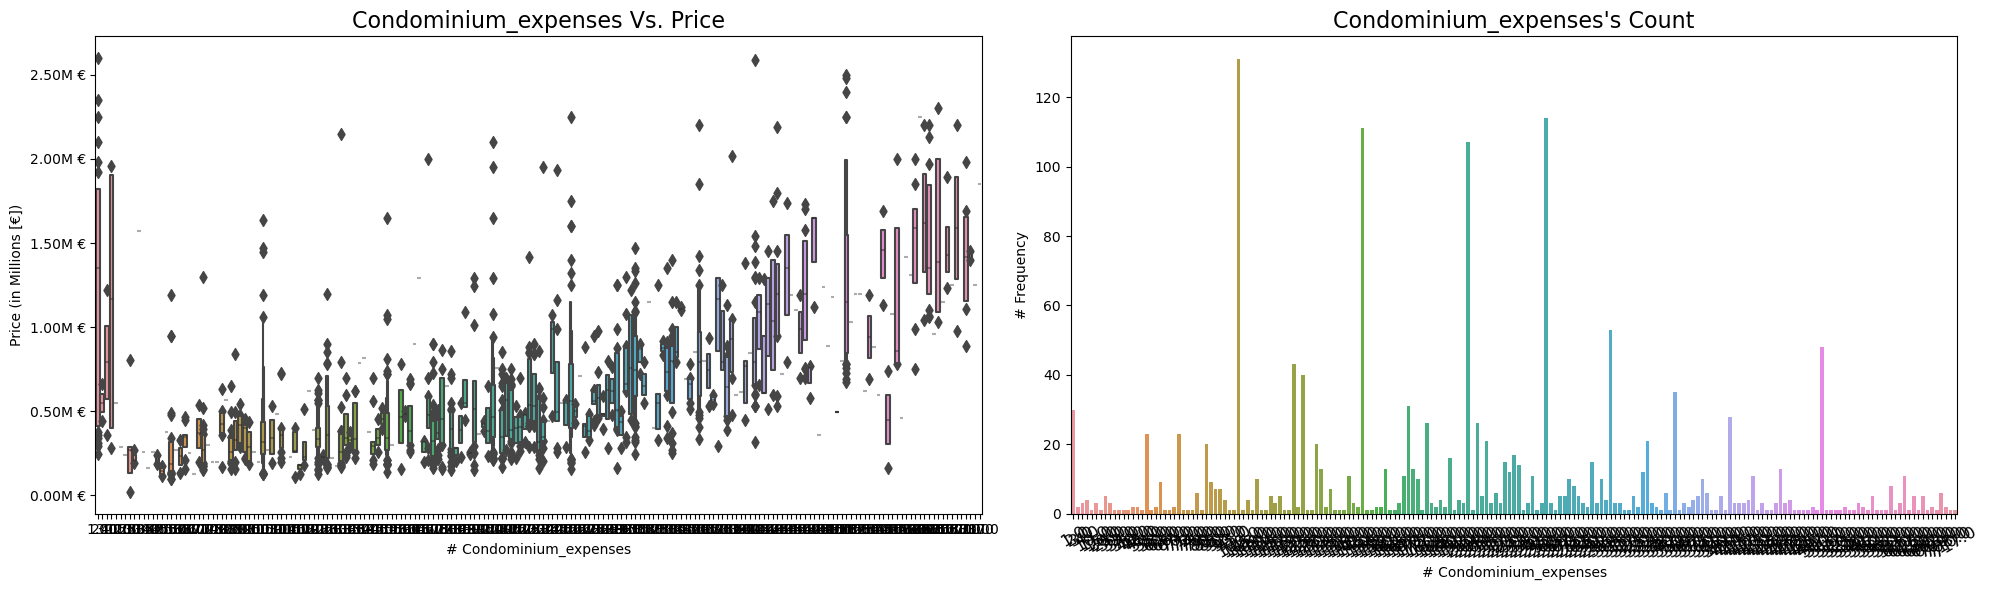

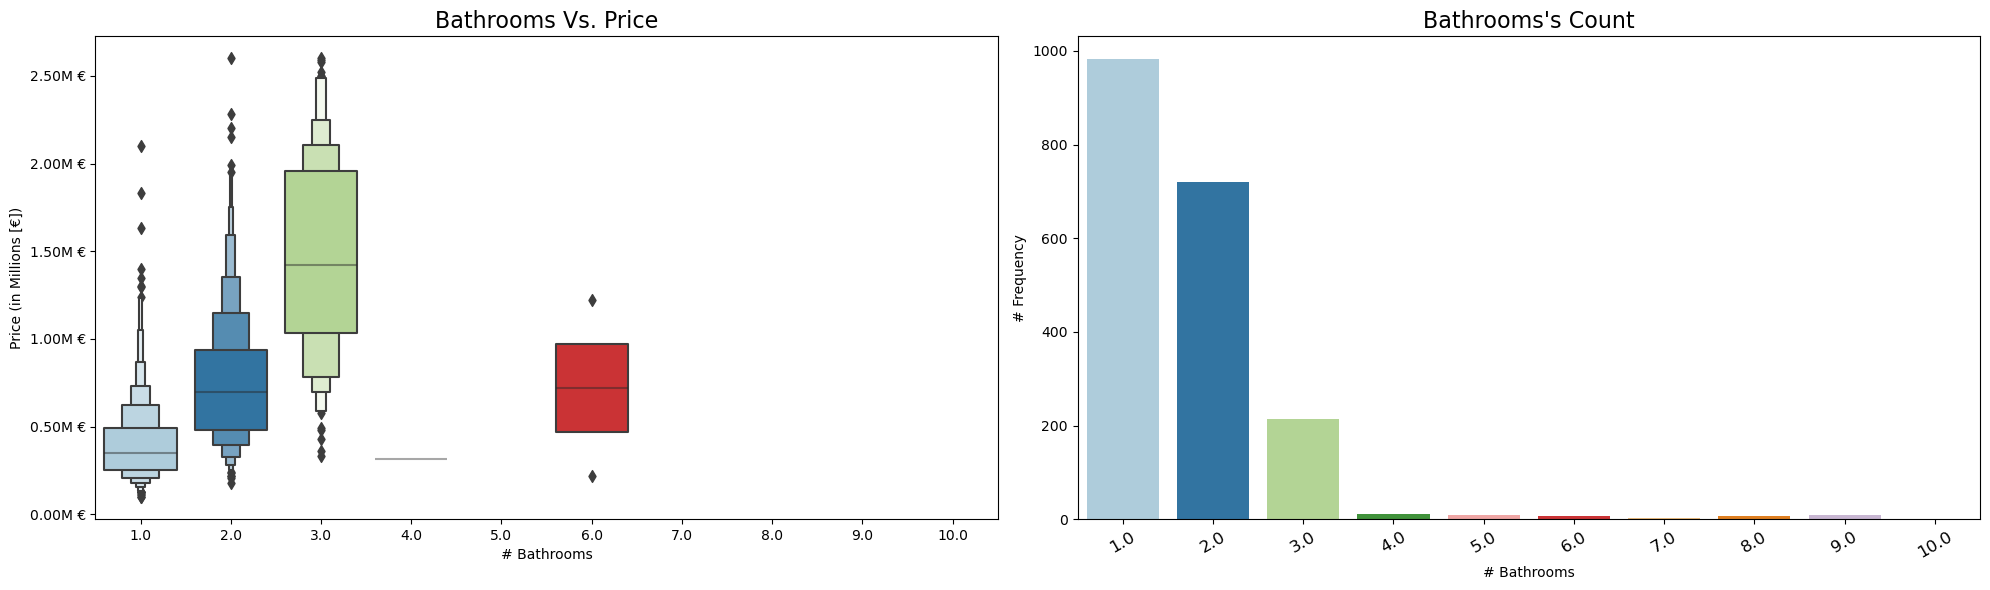

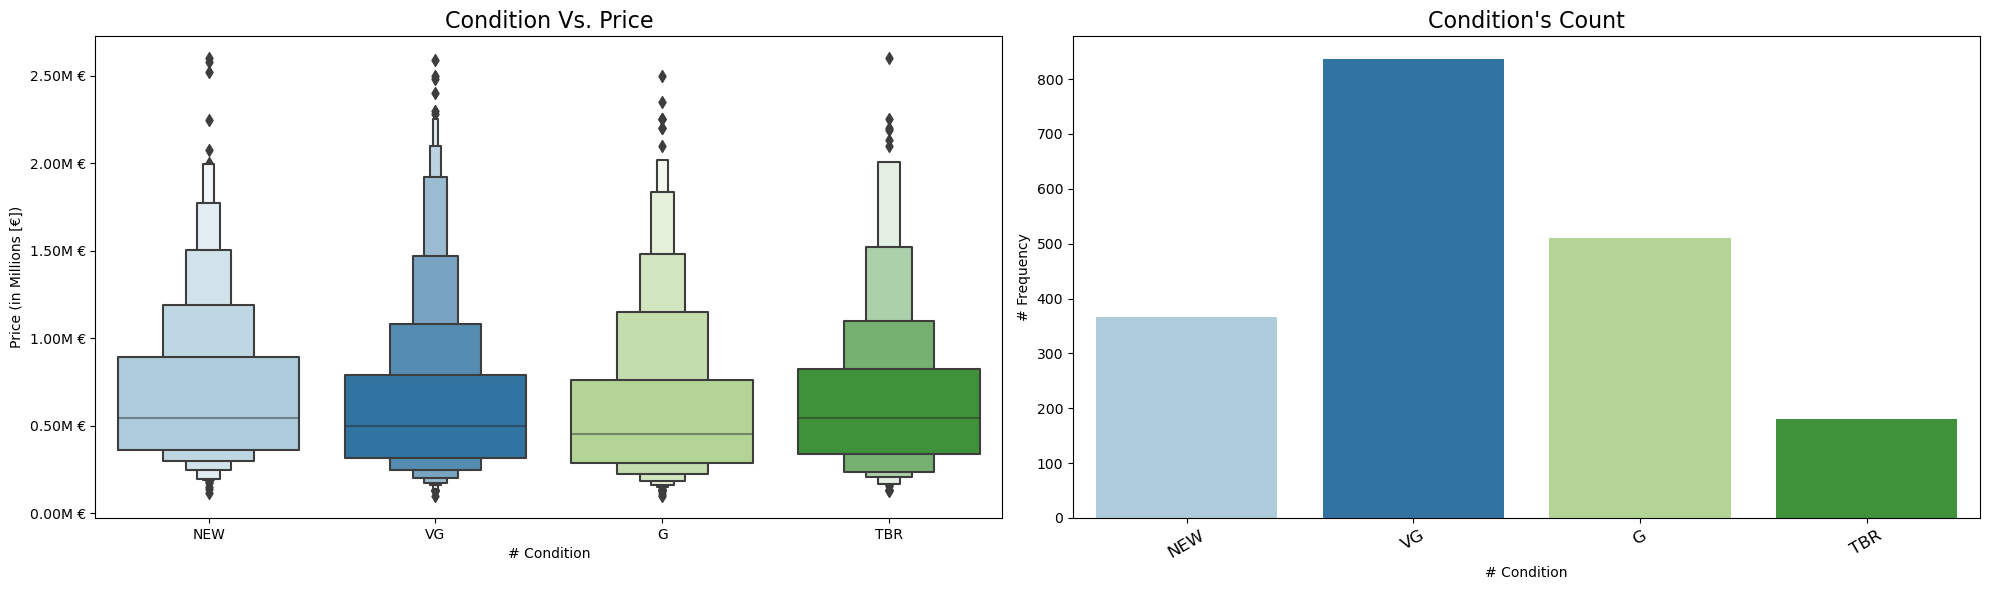

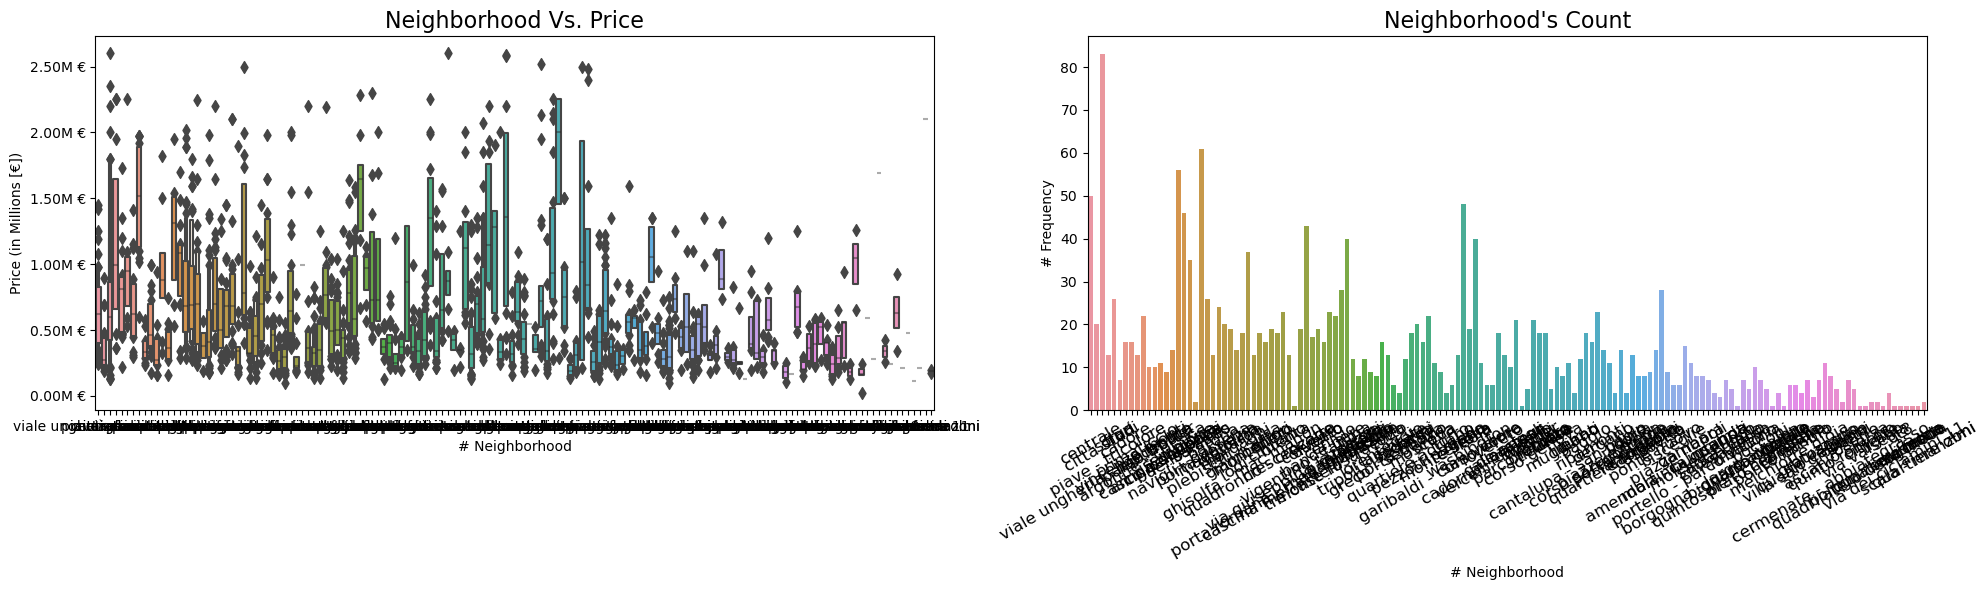

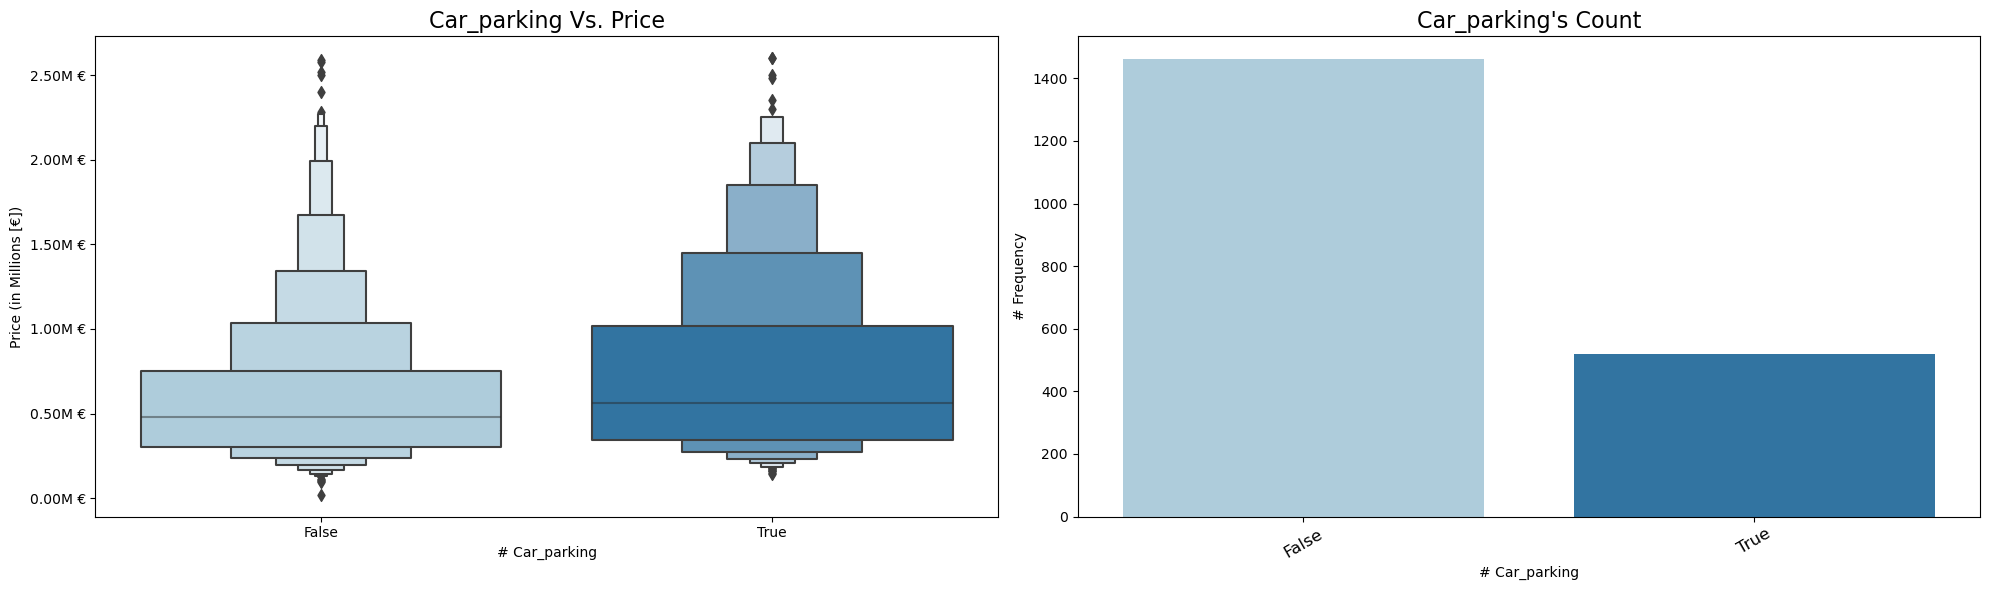

In [20]:
# Visualize 'condominium_expenses' against 'price'
draw_subplots(milan_outliers, "condominium_expenses")

# Visualize 'bathrooms' against 'price'
draw_subplots(milan_outliers, "bathrooms")

# Visualize 'condition' against 'price'
draw_subplots(milan_outliers, "condition")

# Visualize 'neighborhood' against 'price'
draw_subplots(milan_outliers, "neighborhood")

# Visualize 'car_parking' against 'price'
draw_subplots(milan_outliers, "car_parking")

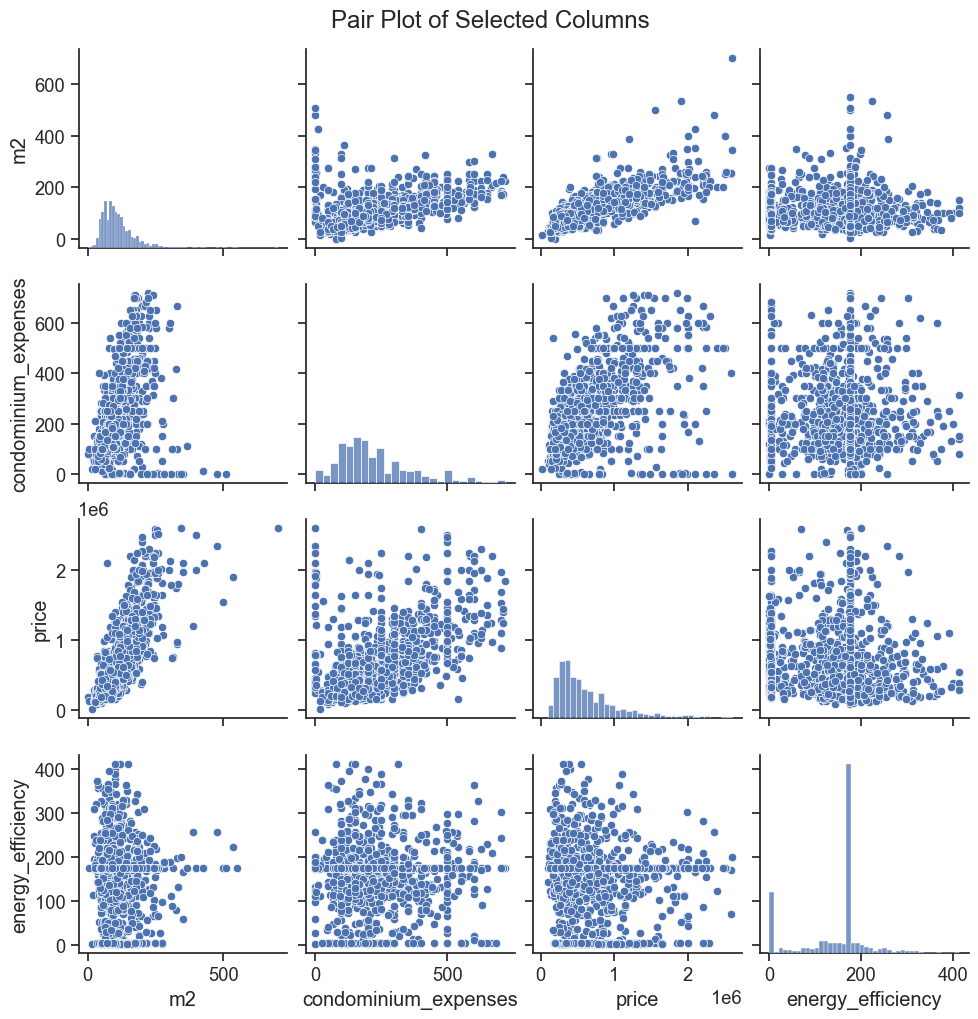

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_pairplot(data, columns, diag_kind='hist', plot_title=None):
    """
    Creates a pair plot for the specified columns of the given DataFrame.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        columns (list): List of column names to include in the pair plot.
        diag_kind (str): Type of diagonal plots ('hist' or 'kde').
        plot_title (str): Title for the pair plot.

    Returns:
        None
    """
    sns.set(style="ticks")
    sns.set_context("notebook", font_scale=1.2)
    
    pair_plot = sns.pairplot(data[columns], diag_kind=diag_kind, height=2.5)
    
    if plot_title:
        pair_plot.fig.suptitle(plot_title, y=1.02)
    
    plt.show()

# Assuming milan_outliers is your pandas DataFrame containing the data
selected_columns = ['m2', 'condominium_expenses', 'price', 'energy_efficiency']
plot_title = "Pair Plot of Selected Columns"

create_pairplot(milan_outliers, selected_columns, diag_kind='hist', plot_title=plot_title)

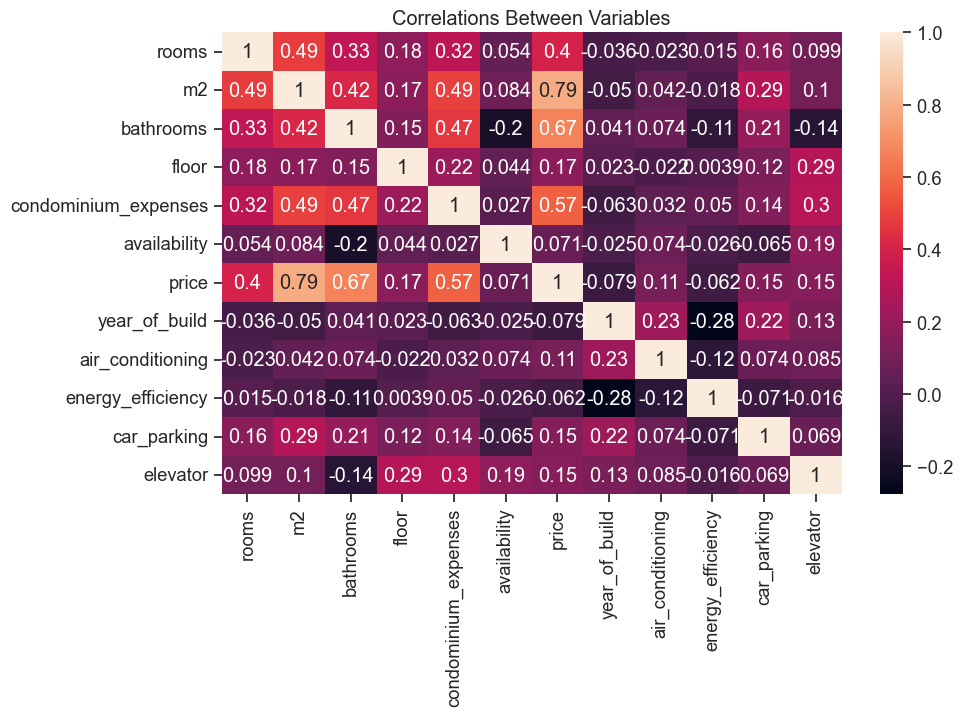

In [22]:
#checking the correlation of features with the target column
corr = milan_outliers.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.title("Correlations Between Variables")
plt.show()

In [23]:
correlation_with_target = corr['price']
correlation_with_target

rooms                   0.397715
m2                      0.788350
bathrooms               0.670068
floor                   0.170386
condominium_expenses    0.573629
availability            0.071413
price                   1.000000
year_of_build          -0.078782
air_conditioning        0.107889
energy_efficiency      -0.062166
car_parking             0.148712
elevator                0.152942
Name: price, dtype: float64

In [24]:
important_num_cols = list(milan_outliers.corr()["price"][(milan_outliers.corr()["price"]>0.50) | (milan_outliers.corr()["price"]<-0.50)].index)

In [25]:
category_cols = ['condition','neighborhood','heating_centralized','heating_radiator',
                 'heating_gas','air_conditiong_centralized','air_conditioning_heat',
                  'energy_class']
important_cols = important_num_cols + category_cols
new_milan_data = milan_outliers[important_cols]

In [26]:
new_milan_data.dtypes

m2                             float64
bathrooms                      float64
condominium_expenses           float64
price                          float64
condition                     category
neighborhood                    object
heating_centralized             object
heating_radiator                object
heating_gas                     object
air_conditiong_centralized      object
air_conditioning_heat           object
energy_class                    object
dtype: object

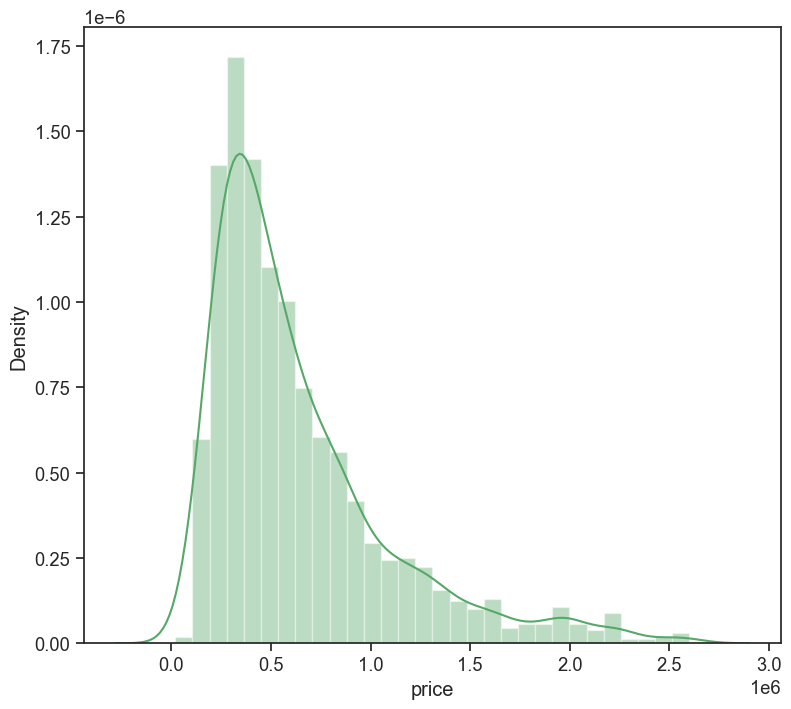

In [27]:
new_milan_data
plt.figure(figsize=(9, 8))
sns.distplot(new_milan_data['price'], color='g', bins=30, hist_kws={'alpha': 0.4});


In [28]:
new_milan_data.isnull().sum()

m2                             15
bathrooms                      22
condominium_expenses          392
price                         113
condition                      88
neighborhood                   14
heating_centralized            48
heating_radiator              150
heating_gas                   339
air_conditiong_centralized    495
air_conditioning_heat         732
energy_class                  145
dtype: int64

In [29]:
# Fill numeric missing values with mean
new_milan_data["m2"].fillna(value = new_milan_data.m2.median(), inplace=True)
new_milan_data["bathrooms"].fillna(value = new_milan_data.bathrooms.median(), inplace=True)
new_milan_data["condominium_expenses"].fillna(value = new_milan_data.condominium_expenses.median(), inplace=True)

# Fill categorical missing values with "missing"
new_milan_data["neighborhood"].fillna("missing", inplace=True)
new_milan_data["heating_centralized"].fillna("missing", inplace=True)
new_milan_data["heating_centralized"].fillna("missing", inplace=True)
new_milan_data["heating_radiator"].fillna("missing", inplace=True)
new_milan_data["heating_gas"].fillna("missing", inplace=True)
new_milan_data["air_conditiong_centralized"].fillna("missing", inplace=True)
new_milan_data["air_conditioning_heat"].fillna("missing", inplace=True)
new_milan_data["energy_class"].fillna("missing", inplace=True)

In [30]:
new_milan_data.isnull().sum()

m2                              0
bathrooms                       0
condominium_expenses            0
price                         113
condition                      88
neighborhood                    0
heating_centralized             0
heating_radiator                0
heating_gas                     0
air_conditiong_centralized      0
air_conditioning_heat           0
energy_class                    0
dtype: int64

In [31]:
# drop missing values

new_milan_data["price"] = new_milan_data["price"].fillna(new_milan_data["price"].mean())
milan_house_price = new_milan_data.dropna()

In [32]:
milan_house_price.shape

(1892, 12)

In [33]:
milan_house_price.dtypes

m2                             float64
bathrooms                      float64
condominium_expenses           float64
price                          float64
condition                     category
neighborhood                    object
heating_centralized             object
heating_radiator                object
heating_gas                     object
air_conditiong_centralized      object
air_conditioning_heat           object
energy_class                    object
dtype: object

In [34]:
milan_house_price.isnull().sum()

m2                            0
bathrooms                     0
condominium_expenses          0
price                         0
condition                     0
neighborhood                  0
heating_centralized           0
heating_radiator              0
heating_gas                   0
air_conditiong_centralized    0
air_conditioning_heat         0
energy_class                  0
dtype: int64

In [35]:
print(milan_house_price.describe())

                m2    bathrooms  condominium_expenses         price
count  1892.000000  1892.000000           1892.000000  1.892000e+03
mean    110.317125     1.589852            221.004228  6.370666e+05
std      59.878352     0.689011            128.107925  4.469829e+05
min       1.000000     1.000000              1.000000  9.800000e+04
25%      70.000000     1.000000            138.500000  3.250000e+05
50%      98.000000     1.000000            200.000000  4.990000e+05
75%     134.000000     2.000000            250.000000  7.950000e+05
max     702.000000     6.000000            717.000000  2.600000e+06


In [36]:
print(f"Skewness of features:\n{milan_house_price.skew()}")

Skewness of features:
m2                      2.476260
bathrooms               0.947000
condominium_expenses    1.253758
price                   1.687015
dtype: float64


In [42]:
# encoding condition coloumn
condition_dummy = pd.get_dummies(milan_house_price["condition"])
milan_data = milan_house_price.merge(condition_dummy, left_index = True, right_index = True)
milan_data.drop(columns = 'condition', inplace = True)
milan_data.head(3)

,m2,bathrooms,condominium_expenses,price,neighborhood,heating_centralized,heating_radiator,heating_gas,air_conditiong_centralized,air_conditioning_heat,energy_class,NEW,VG,G,TBR
0,140.0,2.0,535.0,880000.0,centrale,centralized,to radiators,methane powered,autonomous,cold/hot,D,0,1,0,0
1,121.0,2.0,200.0,649000.0,centrale,autonomous,to radiators,gas powered,system preparation,missing,E,0,1,0,0
2,55.0,1.0,133.0,300000.0,viale ungheria - mecenate,autonomous,to radiators,gas powered,autonomous,cold/hot,E,0,0,1,0


In [43]:
from sklearn.preprocessing import OneHotEncoder

def get_categorical_variables(df):
    """
    Identifies and returns the list of categorical variables from a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        list: A list of column names representing the categorical variables.
        int: The total count of categorical features found in the DataFrame.
    """
    s = (df.dtypes == 'object')
    categorical_columns = list(s[s].index)
    count_categorical_features = len(categorical_columns)
    return categorical_columns, count_categorical_features

# Assuming milan_house_price is your pandas DataFrame containing the data

# Get the list of categorical variables and count of categorical features
categorical_vars, num_categorical_features = get_categorical_variables(milan_data)

print("Categorical variables:")
print(categorical_vars)
print('No. of. categorical features:', num_categorical_features)

Categorical variables:
['neighborhood', 'heating_centralized', 'heating_radiator', 'heating_gas', 'air_conditiong_centralized', 'air_conditioning_heat', 'energy_class']
No. of. categorical features: 7


In [44]:
from sklearn.preprocessing import OneHotEncoder

# one hot encoder can handle Nan/None Values

def one_hot_encode_categorical(df, categorical_vars):
    """
    Performs one-hot encoding on the specified categorical columns of a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to encode.
        object_cols (list): List of column names representing the categorical variables.

    Returns:
        pandas.DataFrame: The DataFrame with one-hot encoded categorical columns.
    """
    one_encoder = OneHotEncoder(sparse=False)
    ohe_cols = pd.DataFrame(one_encoder.fit_transform(df[categorical_vars]))
    ohe_cols.index = df.index
    ohe_cols.columns = one_encoder.get_feature_names_out(input_features=categorical_vars)
    df_final = df.drop(categorical_vars, axis=1)
    df_final = pd.concat([df_final, ohe_cols], axis=1)
    return df_final

# Assuming milan_house_price is your pandas DataFrame containing the data
# Assuming object_cols contains the list of column names representing the categorical variables

# Perform one-hot encoding and obtain the final DataFrame
milan_house_final = one_hot_encode_categorical(milan_data, categorical_vars)

In [45]:
milan_house_final 

,m2,bathrooms,condominium_expenses,price,NEW,VG,G,TBR,neighborhood_affori,neighborhood_amendola - buonarroti,...,air_conditioning_heat_missing,"energy_class_,",energy_class_A,energy_class_B,energy_class_C,energy_class_D,energy_class_E,energy_class_F,energy_class_G,energy_class_missing
0,140.0,2.0,535.0,880000.0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,121.0,2.0,200.0,649000.0,0,1,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,55.0,1.0,133.0,300000.0,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,60.0,1.0,333.0,250000.0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,220.0,3.0,200.0,2250000.0,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,70.0,1.0,135.0,338000.0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2126,90.0,2.0,183.0,280000.0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2127,130.0,2.0,200.0,625000.0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2128,51.0,1.0,200.0,440000.0,0,1,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## DATA MODELLING AND EVALUATION

In [46]:
# Splitting data into features and labels ( X, y)
X = milan_house_final.drop('price', axis=1)
y = milan_house_final["price"]

# Feature normalisation
from sklearn.preprocessing import StandardScaler
S_scale = StandardScaler()
X_scaled = S_scale.fit_transform(X)

In [47]:
# Splitting data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1513, 191), (379, 191), (1513,), (379,))

##### MODEL TRAINING AND EVALUATION

Regression models:
- Support Vector Machine (SVM)
- Random Forest Regressor
- Gradient Boosting
- XGBOOST
- Lasso
- Ridge
- ElasticNet



In [48]:
# models
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor


# evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error

In [49]:
import pandas as pd

# Define column names for the DataFrame
columns = ["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"]

# Create an empty DataFrame with specified columns
model_results = pd.DataFrame(columns=columns)

In [50]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_rmse_cv(regression_model):
    """
    Calculate the root mean squared error (RMSE) using cross-validation for a regression model.

    Args:
        regression_model: The regression model to evaluate.
        X (array-like or DataFrame): Feature matrix.
        y (array-like or DataFrame): Target vector.

    Returns:
        float: The average RMSE across the cross-validation folds.
    """
    rmse = np.sqrt(-cross_val_score(regression_model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse


def calculate_evaluation_metrics(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [51]:
svr_model = SVR(C=100000)
svr_model.fit(X_train, y_train)
y_preds = svr_model.predict(X_test)

# Evaluate model
mae, mse, rmse, r_squared = calculate_evaluation_metrics(y_test, y_preds)
print("Regression metrics on test set")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = calculate_rmse_cv(svr_model)
print("RMSE Cross-Validation:", rmse_cross_val)


#adding results to dataframe
new_row = {
    "Model": "SVR",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
model_results = model_results.append(new_row, ignore_index=True)

Regression metrics on test set
MAE: 174540.7836984933
MSE: 91504650170.25623
RMSE: 302497.355641758
R2 Score: 0.5685483796078503
------------------------------
RMSE Cross-Validation: 284969.8191988556


In [52]:
# Random Forest Regressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

y_preds = rf_model.predict(X_test)

# Evaluate model
mae, mse, rmse, r_squared = calculate_evaluation_metrics(y_test, y_preds)
print("Regression metrics on test set")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = calculate_rmse_cv(rf_model)
print("RMSE Cross-Validation:", rmse_cross_val)


#adding results to dataframe
new_row = {
    "Model": "RandomForestRegressor",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
model_results= model_results.append(new_row, ignore_index=True)

Regression metrics on test set
MAE: 147880.93876373378
MSE: 55353802841.898094
RMSE: 235273.88899301615
R2 Score: 0.7390024672345279
------------------------------
RMSE Cross-Validation: 261486.9767682231


In [53]:
# Evaluate model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_preds = gb_model.predict(X_test)

mae, mse, rmse, r_squared = calculate_evaluation_metrics(y_test, y_preds)
print("Regression metrics on test set")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = calculate_rmse_cv(gb_model)
print("RMSE Cross-Validation:", rmse_cross_val)


#adding results to dataframe
new_row = {
    "Model": "GradientBoostingRegressor",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
model_results = model_results.append(new_row, ignore_index=True)

Regression metrics on test set
MAE: 149930.96645954167
MSE: 50814635474.56899
RMSE: 225421.0182626478
R2 Score: 0.7604049982777196
------------------------------
RMSE Cross-Validation: 250701.72227679574


In [54]:
# Evaluate model
xg_model =  XGBRegressor(n_estimators=1000, learning_rate=0.01)
xg_model.fit(X_train, y_train)
y_preds = xg_model.predict(X_test)

mae, mse, rmse, r_squared = calculate_evaluation_metrics(y_test, y_preds)
print("Regression metrics on test set")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = calculate_rmse_cv(xg_model)
print("RMSE Cross-Validation:", rmse_cross_val)


#adding results to dataframe
new_row = {
    "Model": "XGBRegressor",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
model_results = model_results.append(new_row, ignore_index=True)

Regression metrics on test set
MAE: 137294.2763540888
MSE: 48017785365.53954
RMSE: 219129.6086007994
R2 Score: 0.7735923664528832
------------------------------
RMSE Cross-Validation: 246230.2202922314


In [55]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_preds = ridge_model.predict(X_test)


mae, mse, rmse, r_squared = calculate_evaluation_metrics(y_test, y_preds)
print("Regression metrics on test set")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = calculate_rmse_cv(ridge_model)
print("RMSE Cross-Validation:", rmse_cross_val)


#adding results to dataframe
new_row = {
    "Model": "Ridge",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
model_results = model_results.append(new_row, ignore_index=True)

Regression metrics on test set
MAE: 145726.70849907162
MSE: 60209176884.213
RMSE: 245375.58330896127
R2 Score: 0.716108996856039
------------------------------
RMSE Cross-Validation: 233359.91734040985


In [56]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_preds = lasso_model.predict(X_test)


mae, mse, rmse, r_squared = calculate_evaluation_metrics(y_test, y_preds)
print("Regression metrics on test set")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = calculate_rmse_cv(lasso_model)
print("RMSE Cross-Validation:", rmse_cross_val)


#adding results to dataframe
new_row = {
    "Model": "Lasso",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
model_results = model_results.append(new_row, ignore_index=True)

Regression metrics on test set
MAE: 145754.1014181014
MSE: 60240829542.85614
RMSE: 245440.07322125728
R2 Score: 0.7159597520817472
------------------------------
RMSE Cross-Validation: 236429.66610644376


In [57]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)
y_preds = elastic_model.predict(X_test)


mae, mse, rmse, r_squared = calculate_evaluation_metrics(y_test, y_preds)
print("Regression metrics on test set")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = calculate_rmse_cv(elastic_model)
print("RMSE Cross-Validation:", rmse_cross_val)


#adding results to dataframe
new_row = {
    "Model": "ElasticNet",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
model_results = model_results.append(new_row, ignore_index=True)

Regression metrics on test set
MAE: 159488.6488074525
MSE: 63161696891.09279
RMSE: 251319.90946021923
R2 Score: 0.7021876328724783
------------------------------
RMSE Cross-Validation: 282291.1423610284


In [58]:
model_results.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
4,Ridge,145726.708499,6.020918e+10,245375.583309,0.716109,233359.917340
5,Lasso,145754.101418,6.024083e+10,245440.073221,0.715960,236429.666106
3,XGBRegressor,137294.276354,4.801779e+10,219129.608601,0.773592,246230.220292
2,GradientBoostingRegressor,149930.966460,5.081464e+10,225421.018263,0.760405,250701.722277
1,RandomForestRegressor,147880.938764,5.535380e+10,235273.888993,0.739002,261486.976768
6,ElasticNet,159488.648807,6.316170e+10,251319.909460,0.702188,282291.142361
0,SVR,174540.783698,9.150465e+10,302497.355642,0.568548,284969.819199


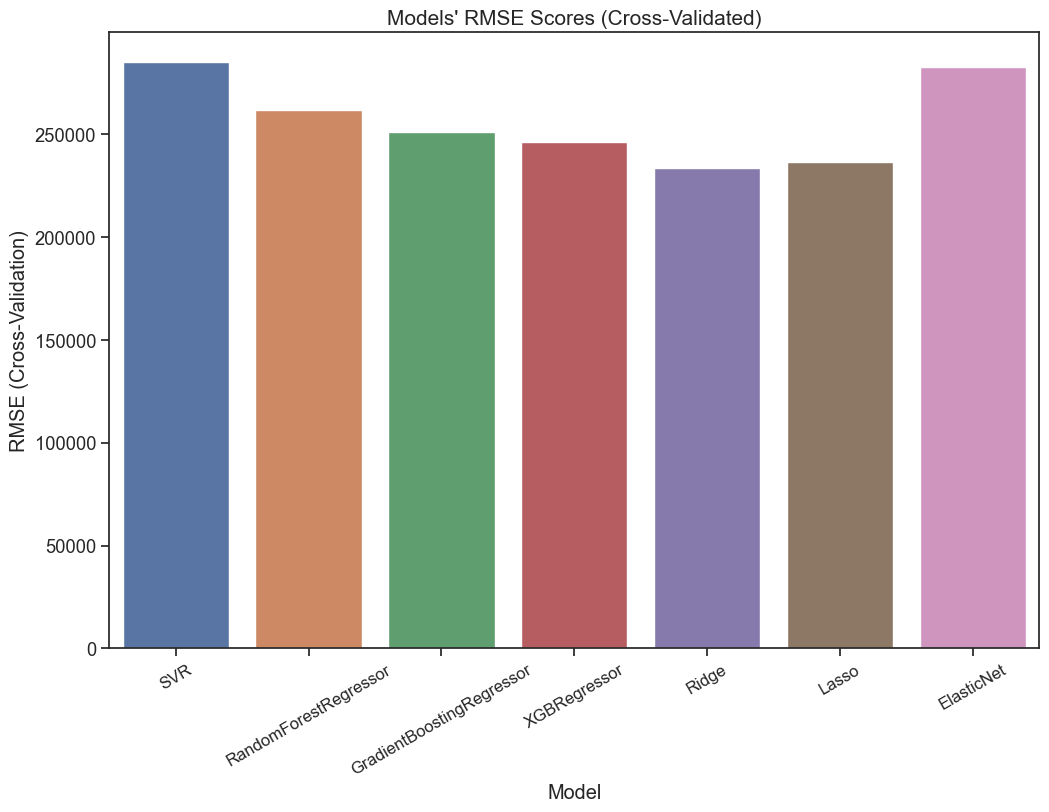

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot using Seaborn
sns.barplot(x=model_results["Model"], y=model_results["RMSE (Cross-Validation)"])

# Customize plot title and axis labels
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)

# Display the plot
plt.show()
